# This is the Juypter Notebook containing simulations for Theorem 2 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [3]:
# import functions for simulation and assumption checking
import bivirus
import numpy as np

# for visualization
import networkx as nx
import gravis as gv
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [4]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [5]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    np.ones(config.N),
    np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    30 * np.ones(config.N),
    20 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.50050961 1.88605606 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.56211491
  1.67562643 0.        ]
 [0.19991683 1.79269898 0.1711156  0.         1.89839503 1.75372476
  0.         0.         1.61642985 1.98947965 0.         0.
  0.         0.         0.         1.91290717 0.         1.82915066
  0.         0.        ]
 [0.         0.15255302 0.         1.81391791 0.         0.
  0.         1.85324135 0.         0.         0.         0.
  0.         1.63046893 1.52575372 1.52771313 0.         0.
  1.50982707 0.        ]
 [0.         1.73389734 1.95187889 0.         0.1062009  1.69746892
  0.         0.         1.89525712 0.         0.         0.
  1.64720756 0.         1.99329845 0.         0.         0.
  0.         1.520101  ]
 [0.         0.         0.         0.05966601 0.         1.88022167
  0.         0.         1.8831194  1.91327549 1.6035491  0.
  0.         

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/1015820000.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [6]:
# visualize the infection network in 3D

B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)

# check for strong connectivity
print("Checking strong connectivity of B1 and B2:")
print("B1 is strongly connected:", nx.is_strongly_connected(B1))
print("B2 is strongly connected:", nx.is_strongly_connected(B2))

gv.three(B1, use_edge_size_normalization=True)

Checking strong connectivity of B1 and B2:
B1 is strongly connected: True
B2 is strongly connected: True


/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_8958/73093820.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


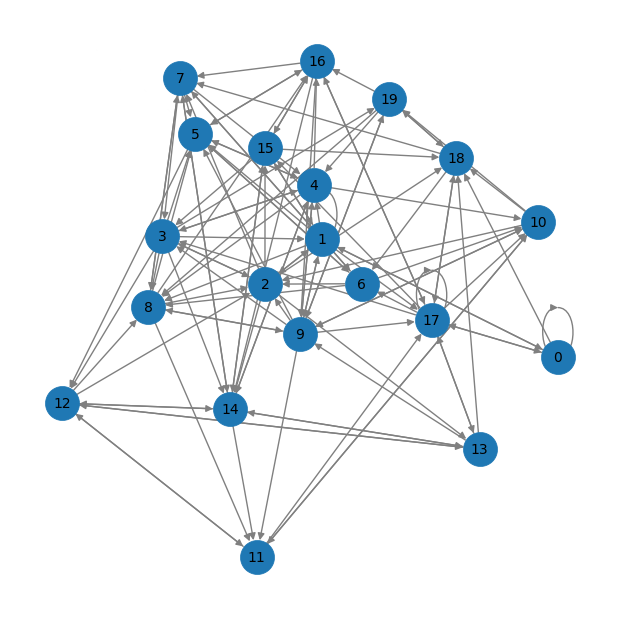

In [7]:
import networkx as nx
pos = nx.spring_layout(B1, dim=2, seed=seed)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))               # ▶ control canvas size
nx.draw(
    B1,
    pos,
    with_labels=True,                    # ▶ show node IDs / labels
    node_size=600,                       # ▶ pixels²
    node_color="#1f78b4",
    edge_color="gray",
    linewidths=0.5,
    font_size=10,
)
plt.axis("off")                          # ▶ hide axes
plt.tight_layout()
plt.show() 


In [8]:
gv.three(B2, use_edge_size_normalization=True)

In [9]:
# check assumptions of the theorems
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 0.9785954397851361
spectral radius 2 is 0.9891991492504427
Theorem 2 satisfied: True
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: divide by zero encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: overflow encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:32: RuntimeWarning: invalid value encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: RuntimeWarning: divide by zero encountered in matmul
  x[1] = x[1] + h * ((np.eye(N) - sum_of_x) @ B[1] - np.diag(delta[1])) @ x[1]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py:33: Runt

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 824
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 877
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625
 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
Main loop Converged at iteration 904
All assumptions satisfied
x1 is [0.5 0.5 0.5 0.5 0.5 0.5 

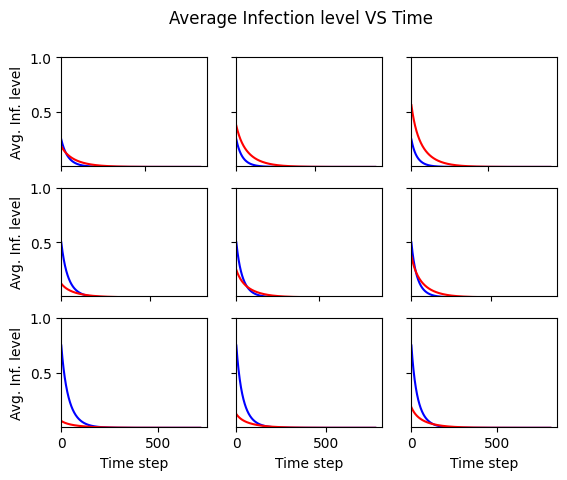

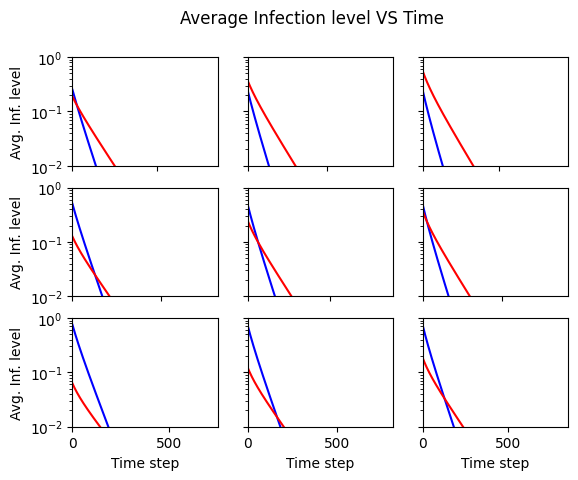

In [10]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')

All assumptions satisfied
Main loop Converged at iteration 836
All assumptions satisfied
Main loop Converged at iteration 830
All assumptions satisfied
Main loop Converged at iteration 842
All assumptions satisfied
Main loop Converged at iteration 860
All assumptions satisfied
Main loop Converged at iteration 859
All assumptions satisfied
Main loop Converged at iteration 840
All assumptions satisfied
Main loop Converged at iteration 841
All assumptions satisfied
Main loop Converged at iteration 831
All assumptions satisfied
Main loop Converged at iteration 848


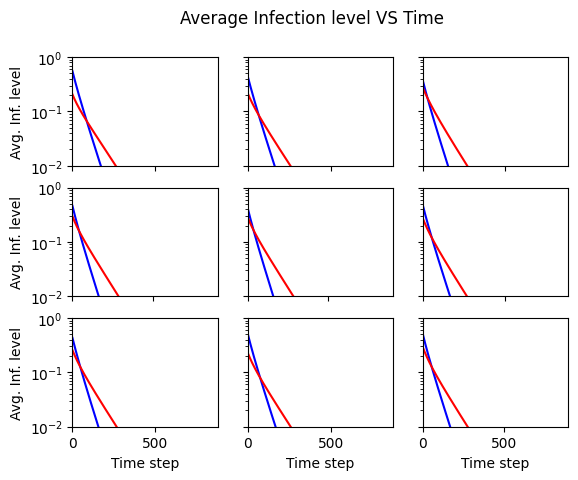

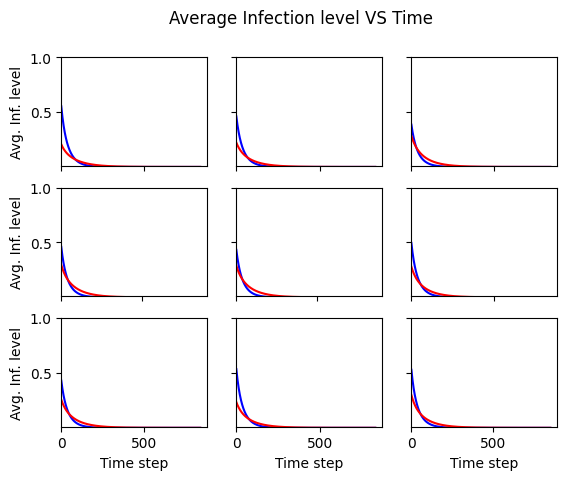

In [11]:
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

x1 is [0.67465672 0.66024814 0.46051642 0.03238734 0.12015979 0.07312578
 0.2500271  0.625871   0.76118797 0.95897688 0.71959252 0.47844667
 0.78098632 0.07196963 0.4799778  0.05525254 0.84308964 0.48058943
 0.21566251 0.27235987]
x2 is [0.04707874 0.21331916 0.3869538  0.06410161 0.3558785  0.90535856
 0.59427675 0.19703926 0.2205075  0.00264169 0.19787203 0.01770532
 0.11788529 0.63000654 0.1270048  0.31039612 0.08314498 0.08921468
 0.67239654 0.6648033 ]
All assumptions satisfied
Main loop Converged at iteration 847
x1 is [0.55736579 0.71075056 0.03929134 0.96188022 0.12223865 0.89816274
 0.97710272 0.10782344 0.05176181 0.23065739 0.63041283 0.80451783
 0.37911392 0.03481841 0.86958368 0.92892636 0.90758867 0.3189381
 0.60009922 0.69284763]
x2 is [0.01410227 0.0014067  0.86615186 0.01041195 0.15531587 0.01430241
 0.01357986 0.64679158 0.13153047 0.5507669  0.08490354 0.07678237
 0.54862195 0.33949841 0.1213016  0.0024269  0.06025007 0.32969797
 0.13392335 0.24975383]
All assumption

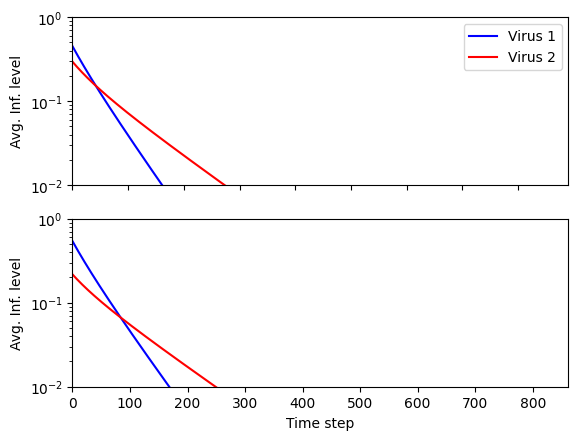

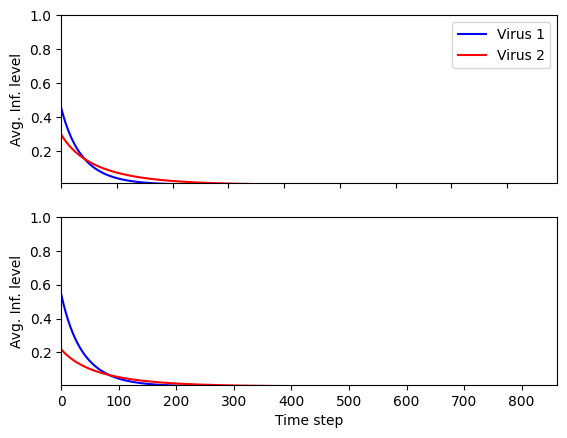

In [12]:
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []

for i in range(2):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    print('x1 is '+str(x1))
    print('x2 is ' + str(x2))
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, yscale='linear')

Let us examine the equilibrium to check if it is close to the DFE $(0, 0)$

In [13]:
x1_bar = [x1_avg_histories[i][-1] for i in range(len(x1_avg_histories))]
print(x1_bar)
print("average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out):", np.mean(x1_bar))
print("variance of equilibria of virus 1 across 9 simulations: ", np.var(x1_bar), "\n")

x2_bar = [x2_avg_histories[i][-1] for i in range(len(x2_avg_histories))]
print(x2_bar)
print("average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out):", np.mean(x2_bar))
print("variance of equilibria of virus 2 across 9 simulations: ", np.var(x2_bar))

[np.float64(3.42681998351037e-09), np.float64(7.194677837271843e-09)]
average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out): 5.310748910391106e-09
variance of equilibria of virus 1 across 9 simulations:  3.549188201538003e-18 

[np.float64(1.9229161538453724e-05), np.float64(1.9327547624973993e-05)]
average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out): 1.927835458171386e-05
variance of equilibria of virus 2 across 9 simulations:  2.4199555051934713e-15
